##Case Study: Trends in World Health and Economics
- Data visualization can be used to dispel common myths and educate the public and contradict sensationalist or outdated claims and stories.
- We will use real data to answer the following questions about world health and economics:
    - Is it still fair to consider the world as divided into the West and the developing world?
    - Has income inequality across countries worsened over the last 40 years?


##Gapminder Dataset
- A selection of world health and economics statistics from the Gapminder project can be found in the dslabs package as data(gapminder).
- Most people have misconceptions about world health and economics, which can be addressed by considering real data.


In [34]:
# load and inspect gapminder data
library(dslabs)
data(gapminder)
head(gapminder)

# compare infant mortality in Sri Lanka and Turkey
gapminder %>%
    filter(year == 2015 & country %in% c("Sri Lanka", "Turkey")) %>%
    select(country, infant_mortality)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
2,Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
3,Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
4,Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
5,Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
6,Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


country,infant_mortality
<fct>,<dbl>
Sri Lanka,8.4
Turkey,11.6


##Life Expectancy and Fertility Rates
- A prevalent worldview is that the world is divided into two groups of countries:
    - Western world: high life expectancy, low fertility rate
    - Developing world: lower life expectancy, higher fertility rate
- Gapminder data can be used to evaluate the validity of this view.
- A scatterplot of life expectancy versus fertility rate in 1962 suggests that this viewpoint was grounded in reality 50 years ago. Is it still the case today?

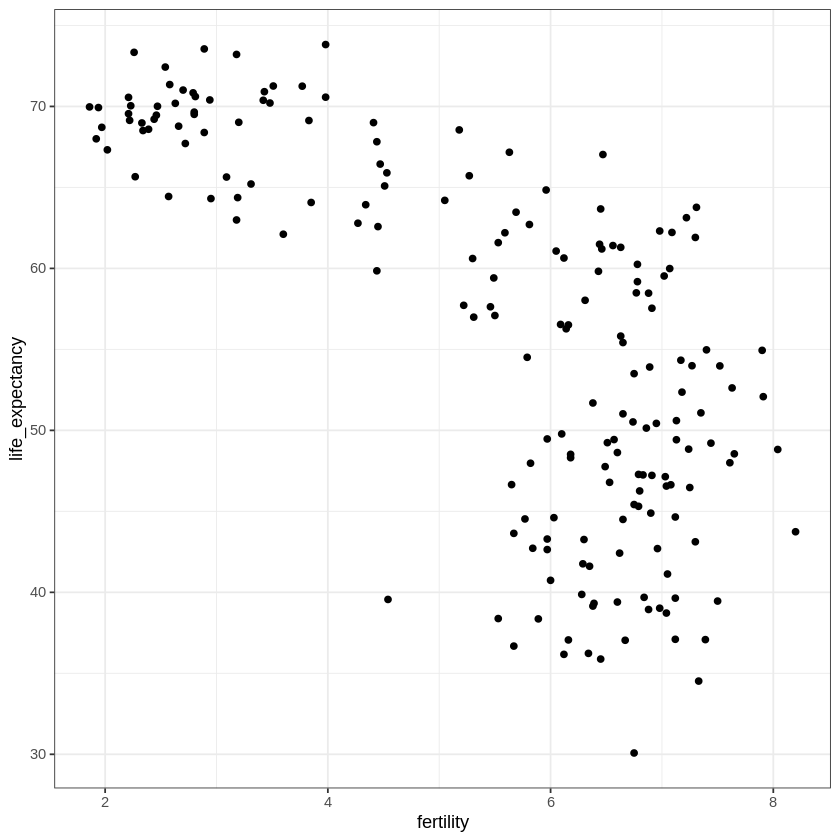

In [36]:
# basic scatterplot of life expectancy versus fertility
ds_theme_set()    # set plot theme
filter(gapminder, year == 1962) %>%
    ggplot(aes(fertility, life_expectancy)) +
    geom_point()


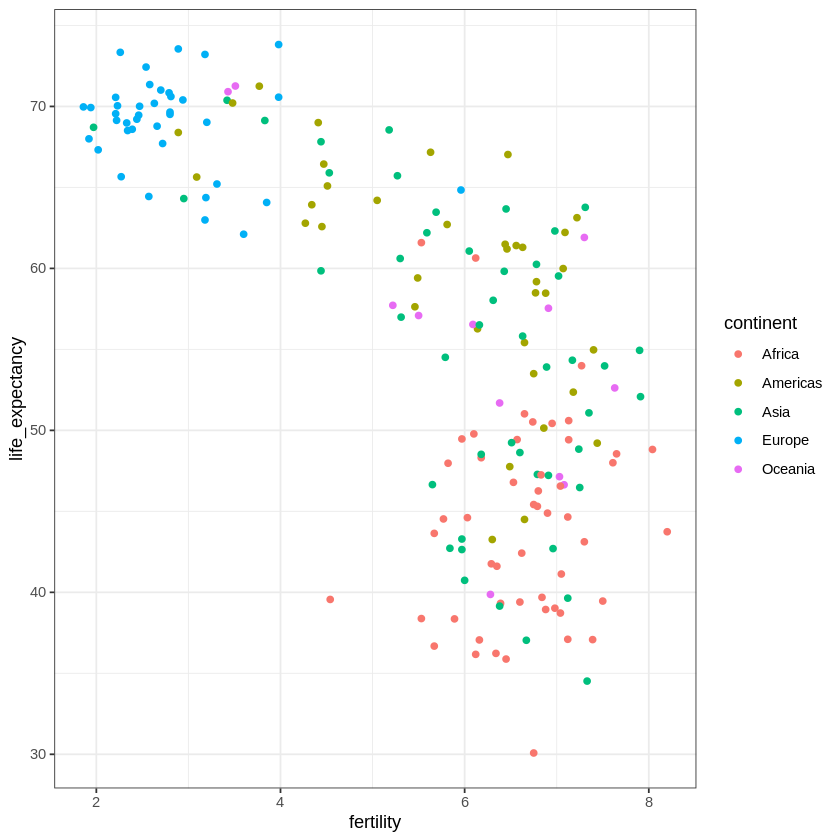

In [37]:
# add color as continent
filter(gapminder, year == 1962) %>%
    ggplot(aes(fertility, life_expectancy, color = continent)) +
    geom_point()

##Faceting
- Faceting makes multiple side-by-side plots stratified by some variable. This is a way to ease comparisons.
- The facet_grid() function allows faceting by up to two variables, with rows faceted by one variable and columns faceted by the other variable. To facet by only one variable, use the dot operator as the other variable.
- The facet_wrap() function facets by one variable and automatically wraps the series of plots so they have readable dimensions.
- Faceting keeps the axes fixed across all plots, easing comparisons between plots.
- The data suggest that the developing versus Western world view no longer makes sense in 2012.

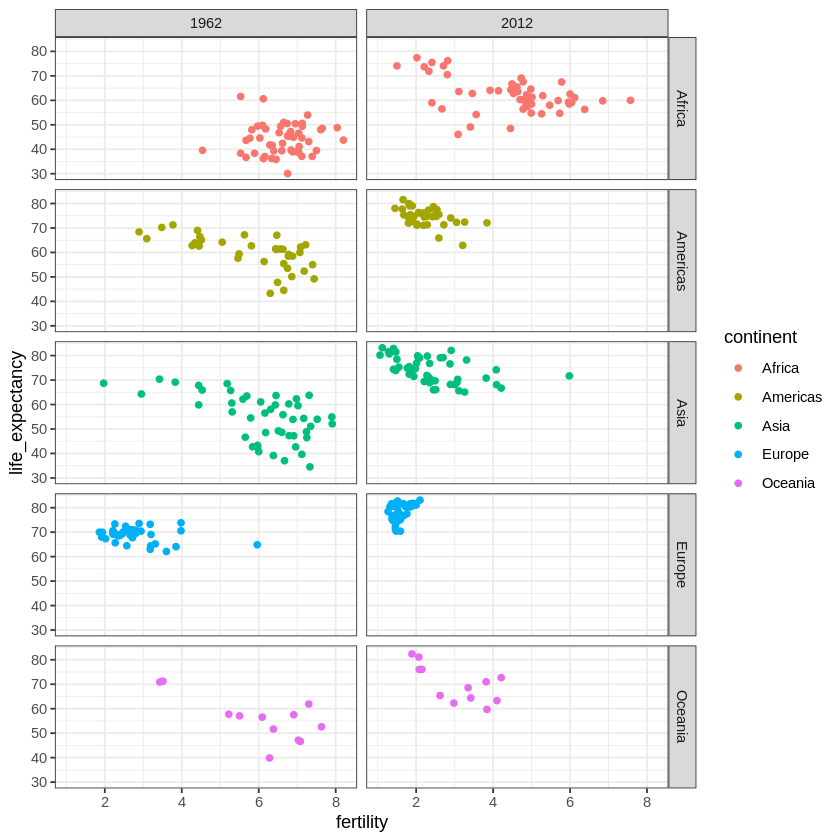

In [38]:
# facet by continent and year
filter(gapminder, year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_grid(continent ~ year)


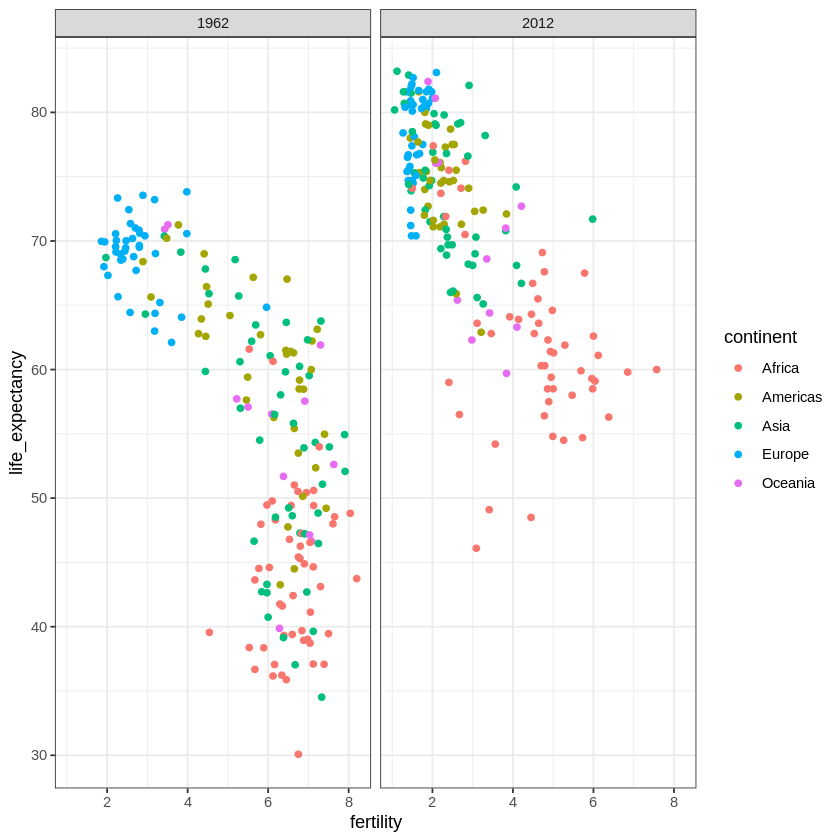

In [39]:

# facet by year only
filter(gapminder, year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_grid(. ~ year)


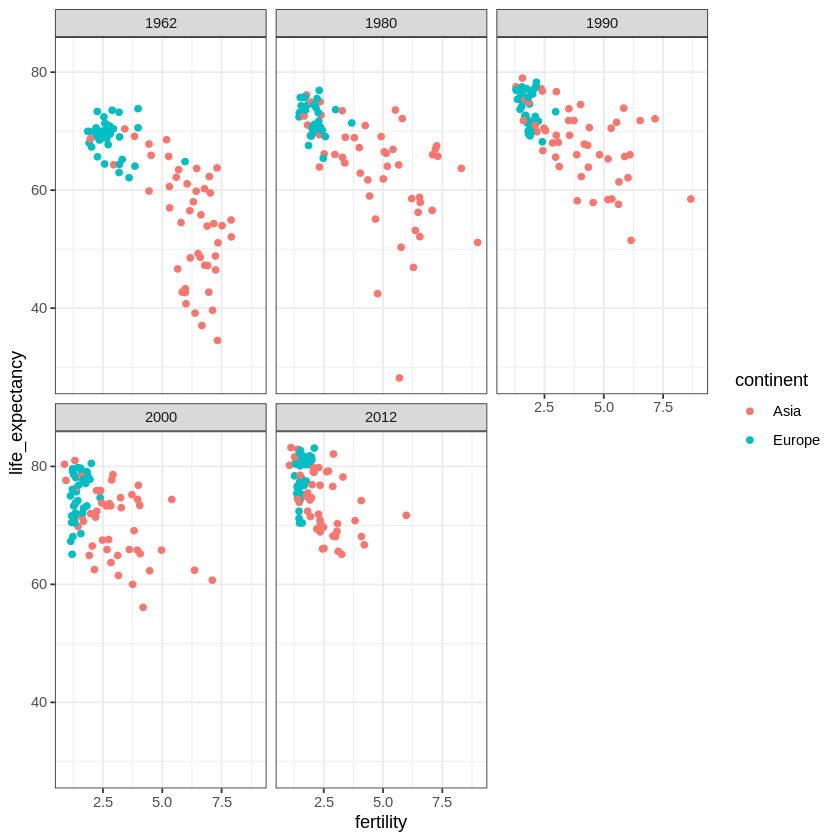

In [40]:

# facet by year, plots wrapped onto multiple rows
years <- c(1962, 1980, 1990, 2000, 2012)
continents <- c("Europe", "Asia")
gapminder %>%
    filter(year %in% years & continent %in% continents) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_wrap(~year)

##Time Series Plots
- Time series plots have time on the x-axis and a variable of interest on the y-axis.
- The geom_line() geometry connects adjacent data points to form a continuous line. A line plot is appropriate when points are regularly spaced, densely packed and from a single data series.
- You can plot multiple lines on the same graph. Remember to group or color by a variable so that the lines are plotted independently.
- Labeling is usually preferred over legends. However, legends are easier to make and appear by default. Add a label with geom_text(), specifying the coordinates where the label should appear on the graph.

Warning message:
“Removed 1 rows containing missing values (geom_point).”


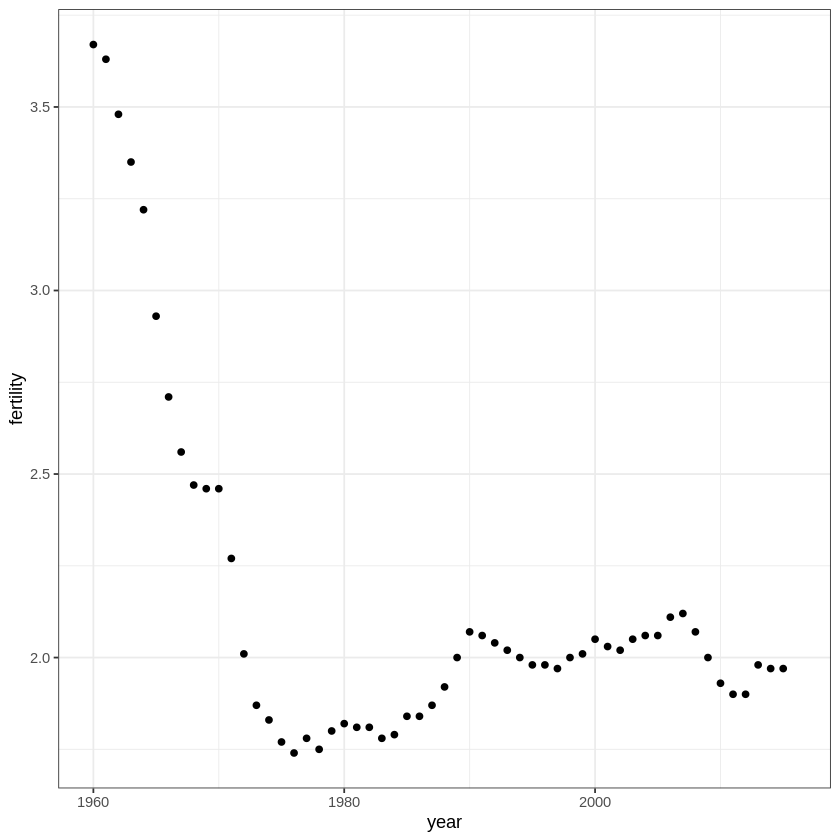

In [41]:
#1.Code: Single time series
# scatterplot of US fertility by year
gapminder %>%
    filter(country == "United States") %>%
    ggplot(aes(year, fertility)) +
    geom_point()

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


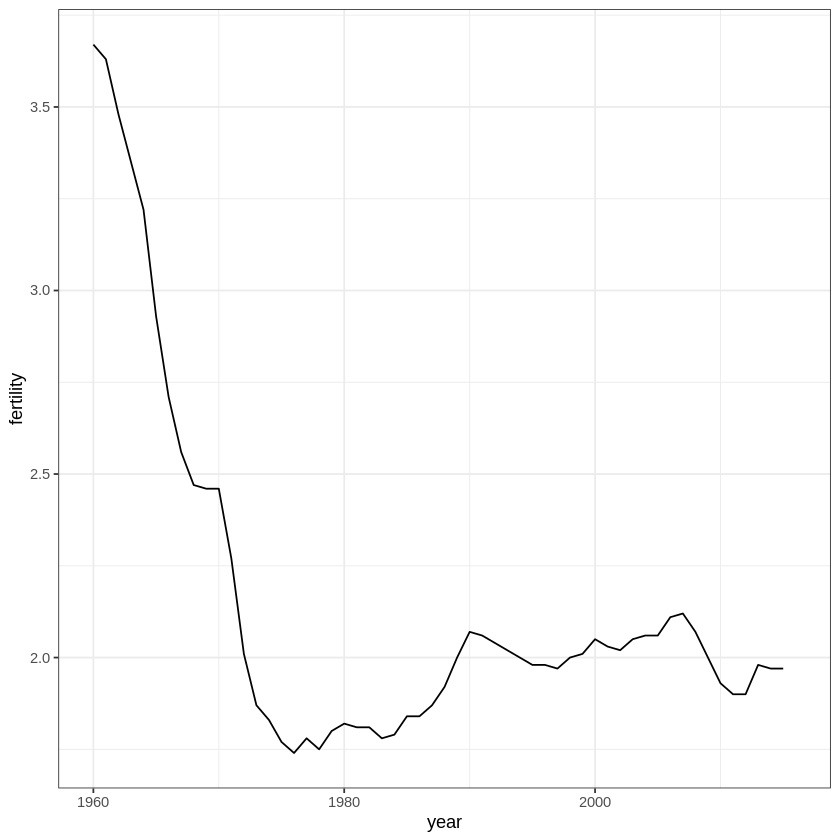

In [42]:
# line plot of US fertility by year
gapminder %>%
    filter(country == "United States") %>%
    ggplot(aes(year, fertility)) +
    geom_line()


Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


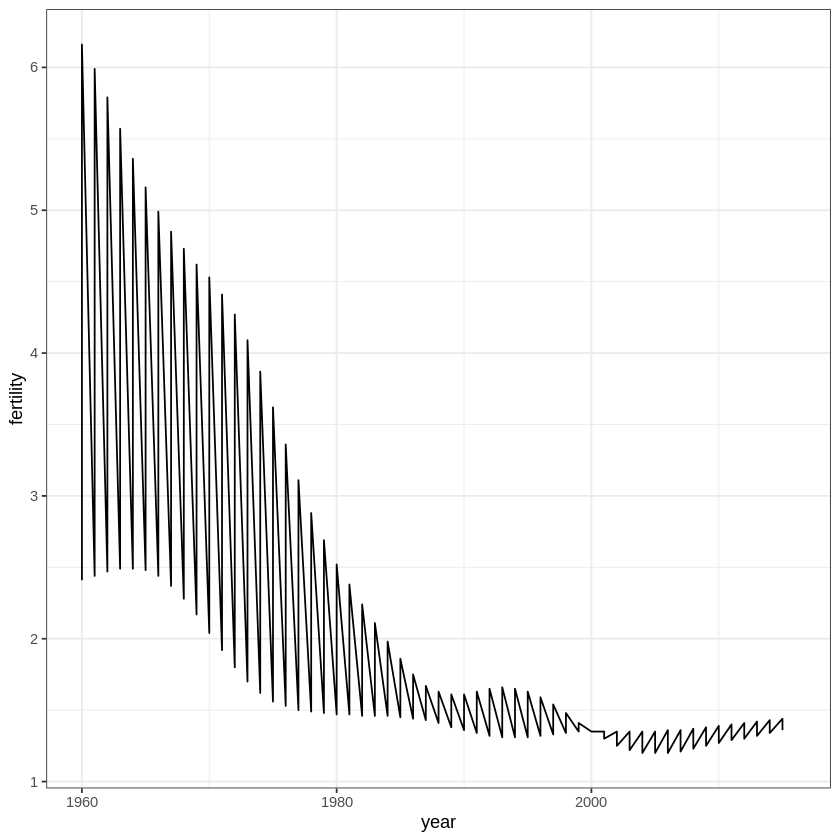

In [43]:
#2. Code: Multiple time series
# line plot fertility time series for two countries- only one line (incorrect)
countries <- c("South Korea", "Germany")
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, fertility)) +
    geom_line()


Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


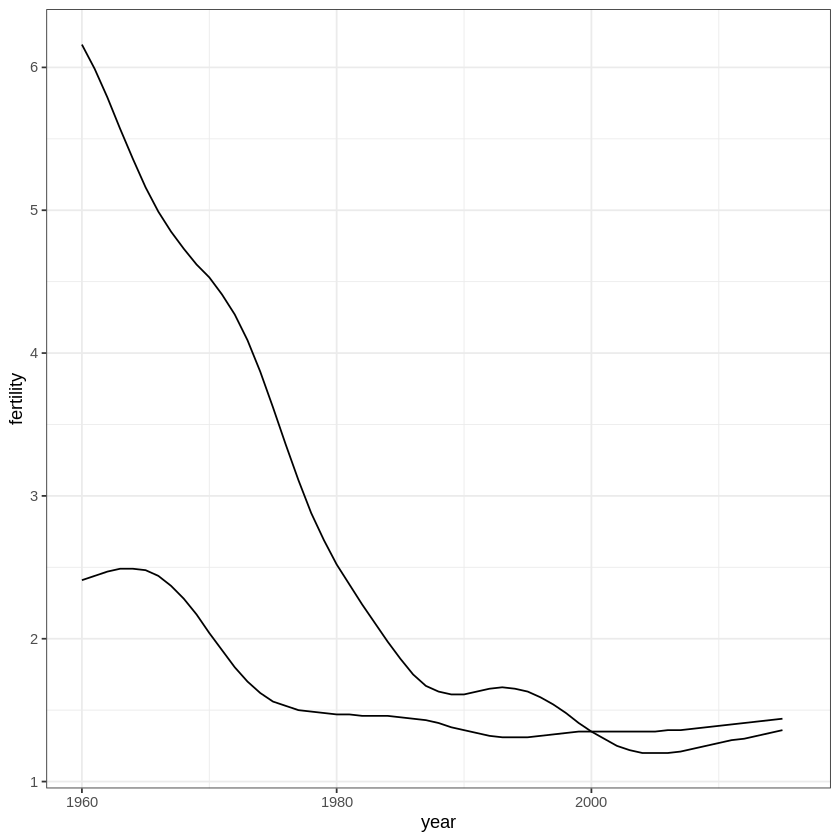

In [44]:
    
# line plot fertility time series for two countries - one line per country
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, fertility, group = country)) +
    geom_line()



Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


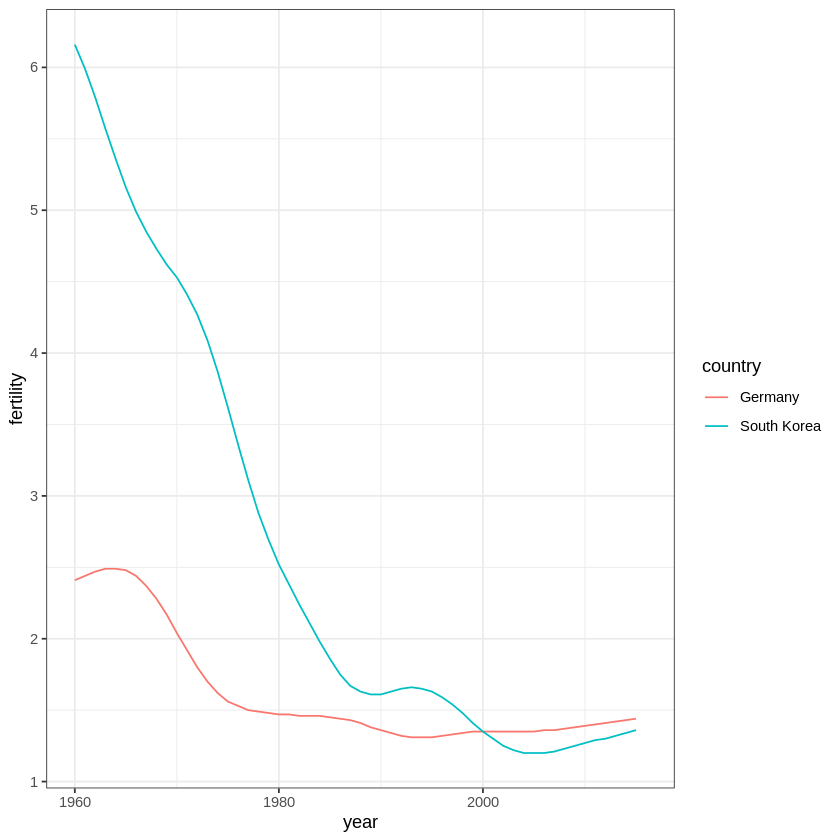

In [45]:
# fertility time series for two countries - lines colored by country
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, fertility, col = country)) +
    geom_line()


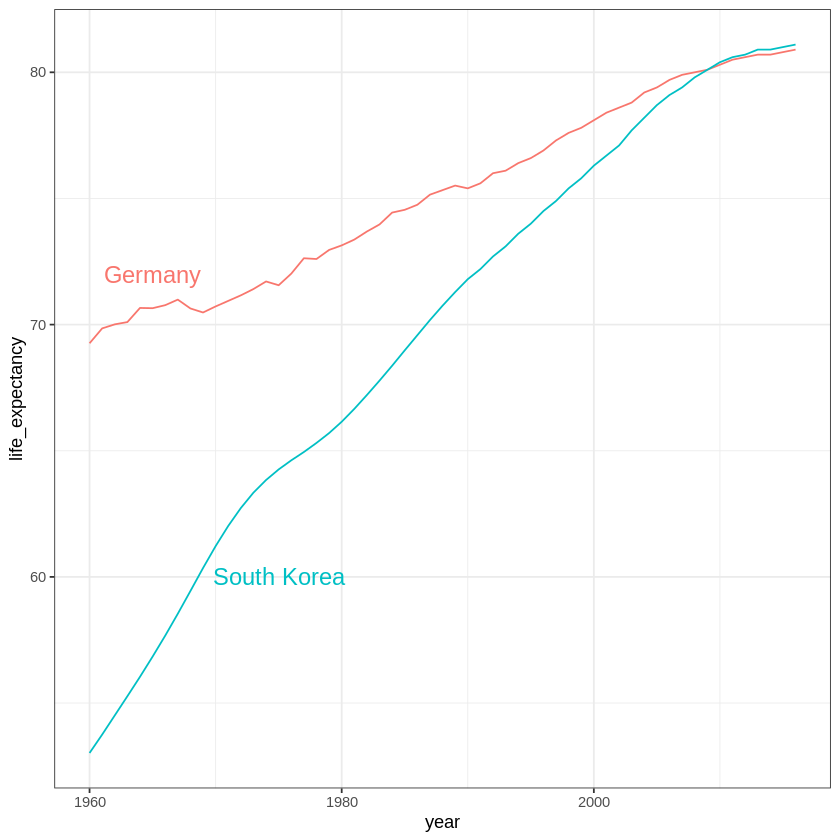

In [46]:
#3. Code: Adding text labels to a plot
# life expectancy time series - lines colored by country and labeled, no legend
labels <- data.frame(country = countries, x = c(1975, 1965), y = c(60, 72))
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, life_expectancy, col = country)) +
    geom_line() +
    geom_text(data = labels, aes(x, y, label = country), size = 5) +
    theme(legend.position = "none")

##Transformations
- We use GDP data to compute income in US dollars per day, adjusted for inflation.
- Log transformations convert multiplicative changes into additive changes.
- Common transformations are the log base 2 transformation and the log base 10 transformation. The choice of base depends on the range of the data. The natural log is not recommended for visualization because it is difficult to interpret.
- The mode of a distribution is the value with the highest frequency. The mode of a normal distribution is the average. A distribution can have multiple local modes.
- There are two ways to use log transformations in plots: transform the data before plotting or transform the axes of the plot. Log scales have the advantage of showing the original values as axis labels, while log transformed values ease interpretation of intermediate values between labels.
- Scale the x-axis using scale_x_continuous() or scale_x_log10() layers in ggplot2. Similar functions exist for the y-axis.
- In 1970, income distribution is bimodal, consistent with the dichotomous Western versus developing worldview.

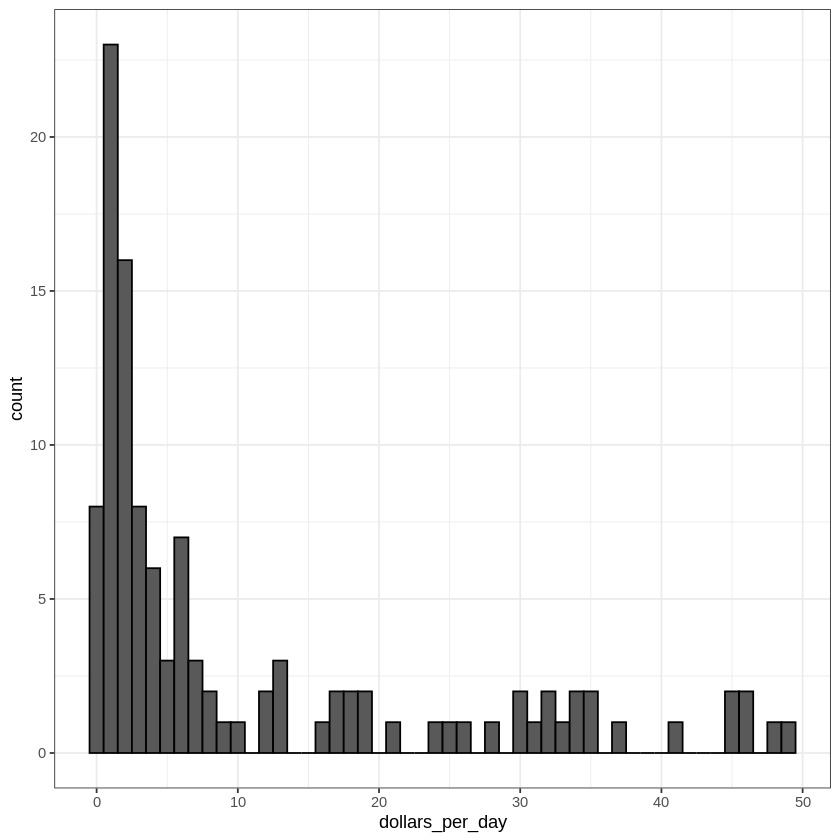

In [47]:
# add dollars per day variable
gapminder <- gapminder %>%
    mutate(dollars_per_day = gdp/population/365)

# histogram of dollars per day
past_year <- 1970
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black")


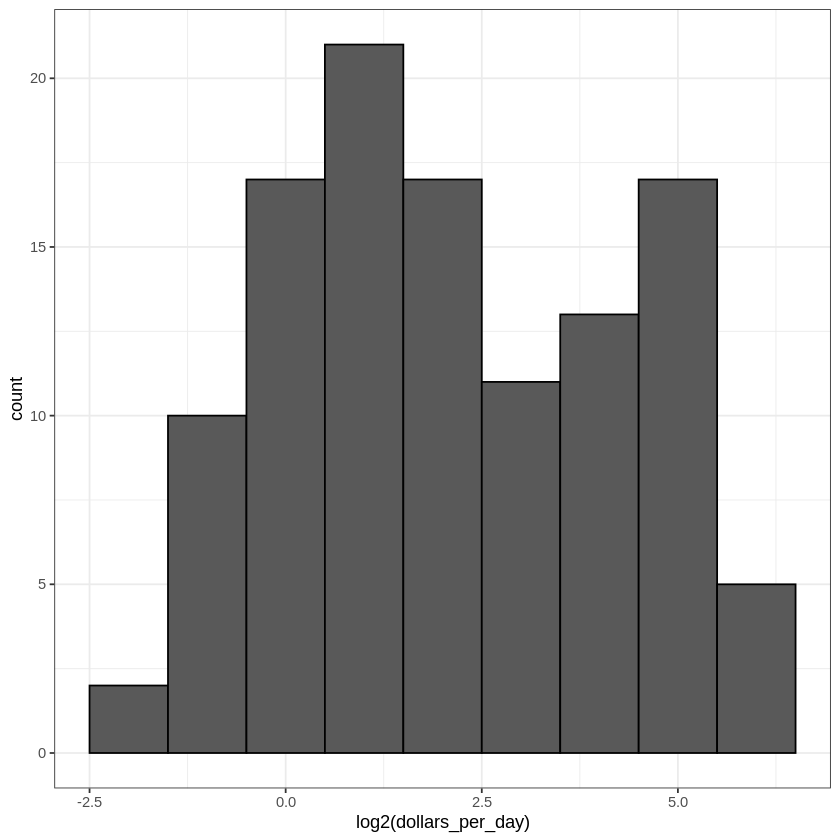

In [48]:
# repeat histogram with log2 scaled data
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(log2(dollars_per_day))) +
    geom_histogram(binwidth = 1, color = "black")


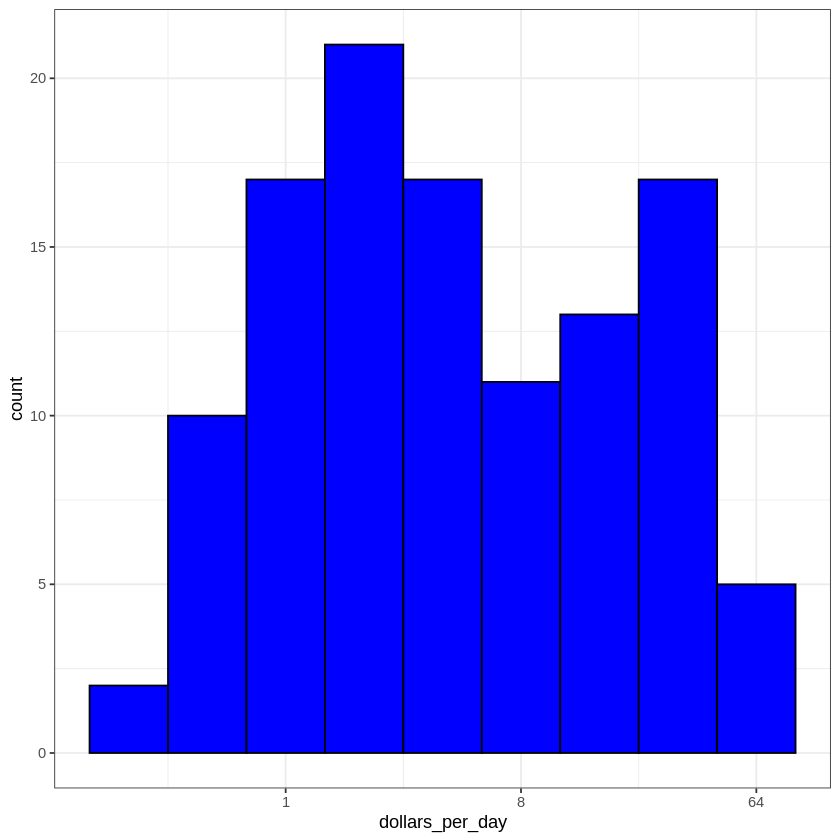

In [52]:
    
# repeat histogram with log2 scaled x-axis
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black",fill="blue") +
    scale_x_continuous(trans = "log2")

##Stratify and Boxplot
- Make boxplots stratified by a categorical variable using the geom_boxplot() geometry.
- Rotate axis labels by changing the theme through element_text(). You can change the angle and justification of the text labels.
- Consider ordering your factors by a meaningful value with the reorder() function, which changes the order of factor levels based on a related numeric vector. This is a way to ease comparisons.
- Show the data by adding data points to the boxplot with a geom_point() layer. This adds information beyond the five-number summary to your plot, but too many data points it can obfuscate your message.


In [53]:
#1. Code: Boxplot of GDP by region
# add dollars per day variable
gapminder <- gapminder %>%
    mutate(dollars_per_day = gdp/population/365)
    
# number of regions
length(levels(gapminder$region))

[1] 22

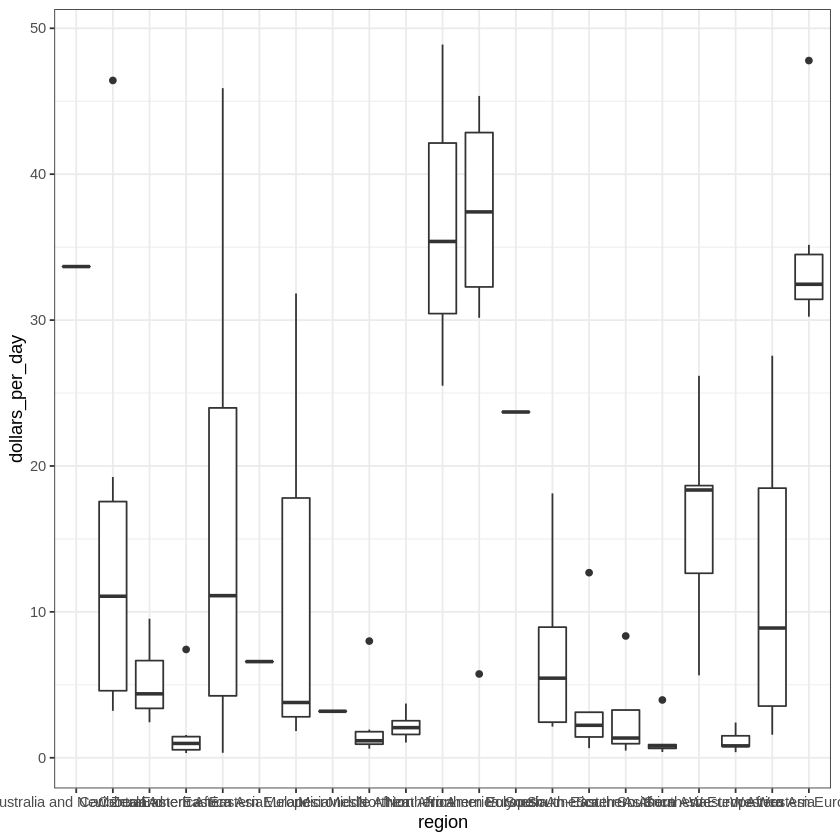

In [54]:

# boxplot of GDP by region in 1970
past_year <- 1970
p <- gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(region, dollars_per_day))
p + geom_boxplot()

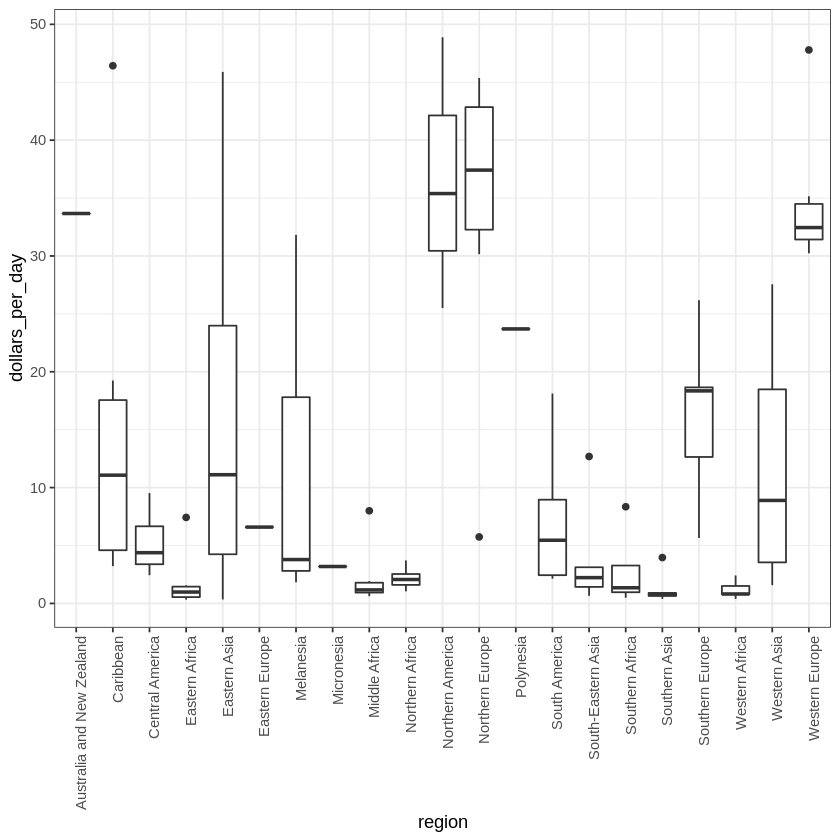

In [55]:
# rotate names on x-axis
p + geom_boxplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))


In [56]:
#2. Code: The reorder function
# by default, factor order is alphabetical
fac <- factor(c("Asia", "Asia", "West", "West", "West"))
levels(fac)

# reorder factor by the category means
value <- c(10, 11, 12, 6, 4)
fac <- reorder(fac, value, FUN = mean)
levels(fac)


[1] "Asia" "West"

[1] "West" "Asia"

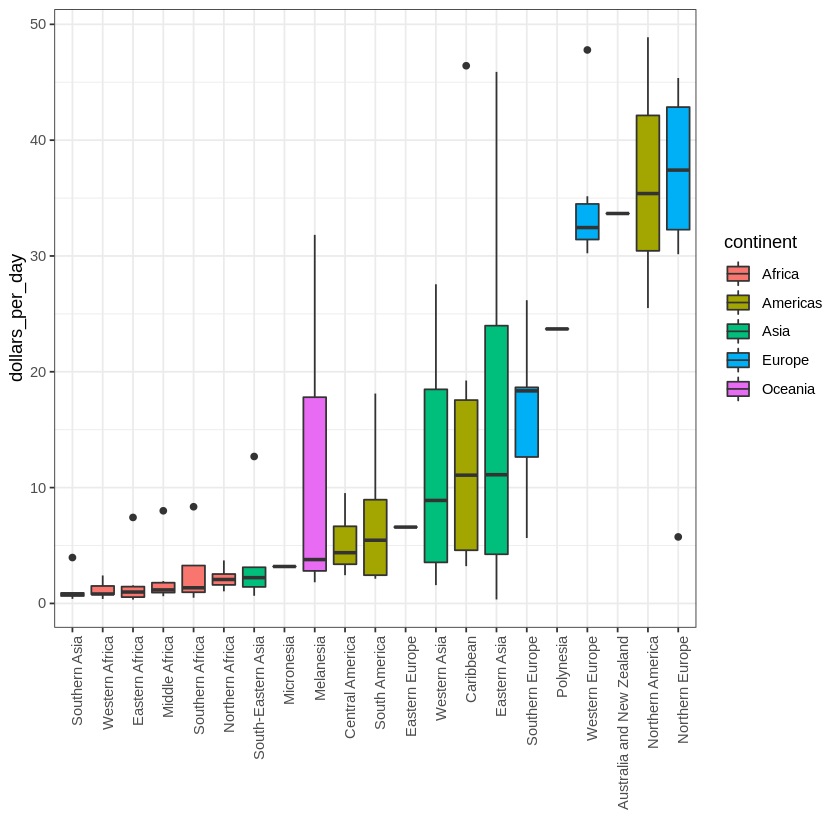

In [57]:
#3.Code: Enhanced boxplot ordered by median income, scaled, and showing data
# reorder by median income and color by continent
p <- gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%    # reorder
    ggplot(aes(region, dollars_per_day, fill = continent)) +    # color by continent
    geom_boxplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab("")
p

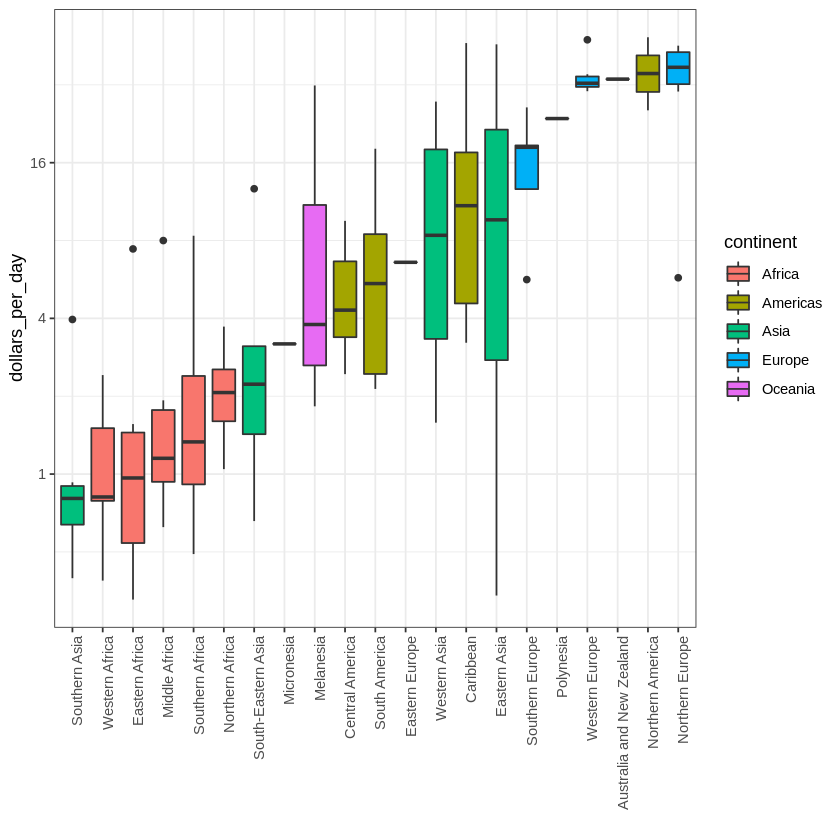

In [58]:

# log2 scale y-axis
p + scale_y_continuous(trans = "log2")


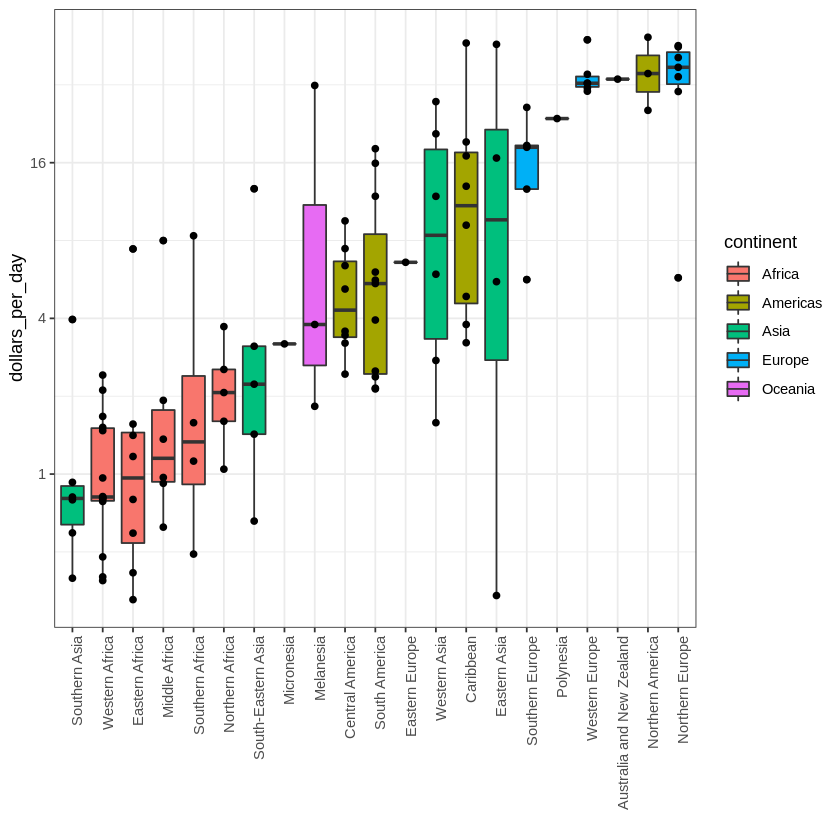

In [59]:
# add data points
p + scale_y_continuous(trans = "log2") + geom_point(show.legend = FALSE)

##Comparing Distributions
- Use intersect() to find the overlap between two vectors.
- To make boxplots where grouped variables are adjacaent, color the boxplot by a factor instead of faceting by that factor. This is a way to ease comparisons.
- The data suggest that the income gap between rich and poor countries has narrowed, not expanded.

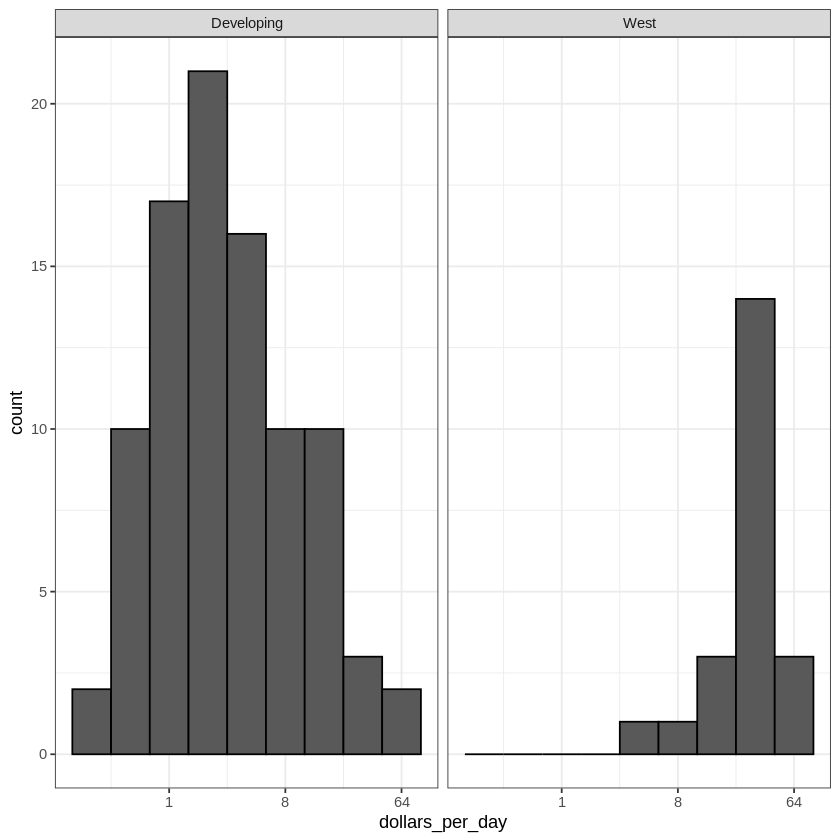

In [60]:
#1.Code: Histogram of income in West versus developing world, 1970 and 2010
# add dollars per day variable and define past year
gapminder <- gapminder %>%
    mutate(dollars_per_day = gdp/population/365)
past_year <- 1970

# define Western countries
west <- c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")

# facet by West vs devloping
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    facet_grid(. ~ group)


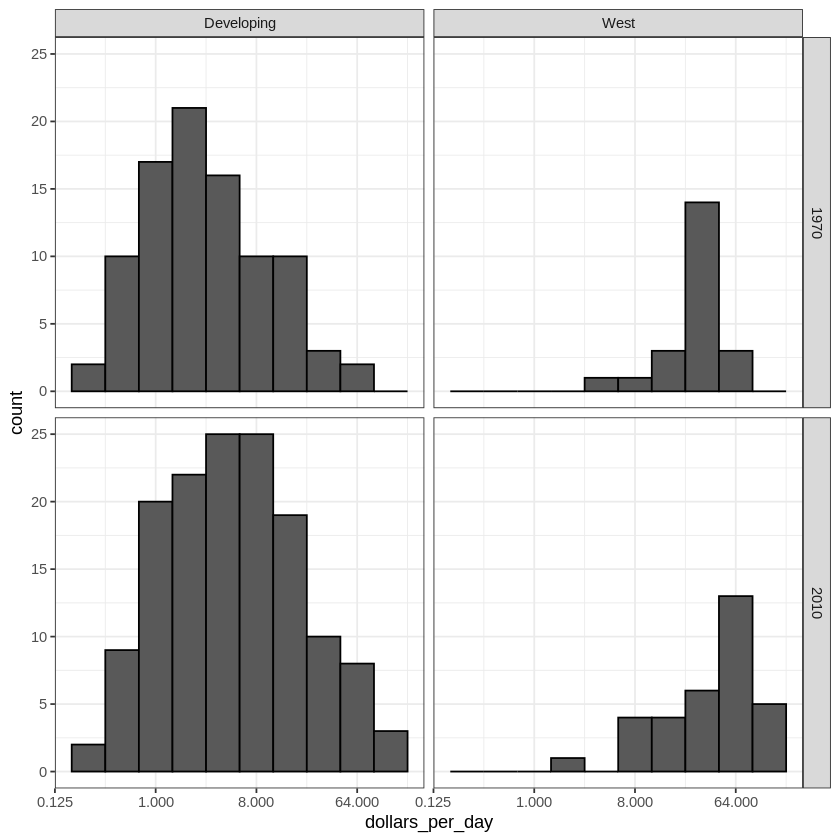

In [61]:

# facet by West/developing and year
present_year <- 2010
gapminder %>%
    filter(year %in% c(past_year, present_year) & !is.na(gdp)) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    facet_grid(year ~ group)


In [62]:
#2. Code: Income distribution of West versus developing world, only countries with data 
# define countries that have data available in both years
country_list_1 <- gapminder %>%
    filter(year == past_year & !is.na(dollars_per_day)) %>% .$country
    country_list_2 <- gapminder %>%
    filter(year == present_year & !is.na(dollars_per_day)) %>% .$country
    country_list <- intersect(country_list_1, country_list_2)


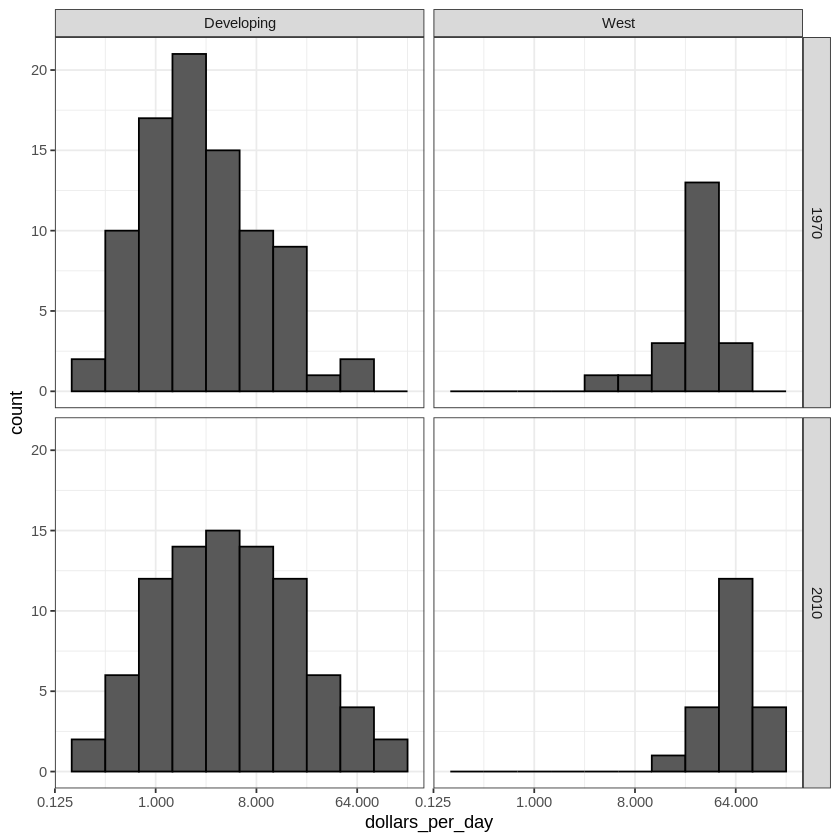

In [63]:

# make histogram including only countries with data available in both years
gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%    # keep only selected countries
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    facet_grid(year ~ group)


In [64]:
#3. Code: Boxplots of income in West versus developing world, 1970 and 2010
p <- gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%
    ggplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab("") + scale_y_continuous(trans = "log2")
  

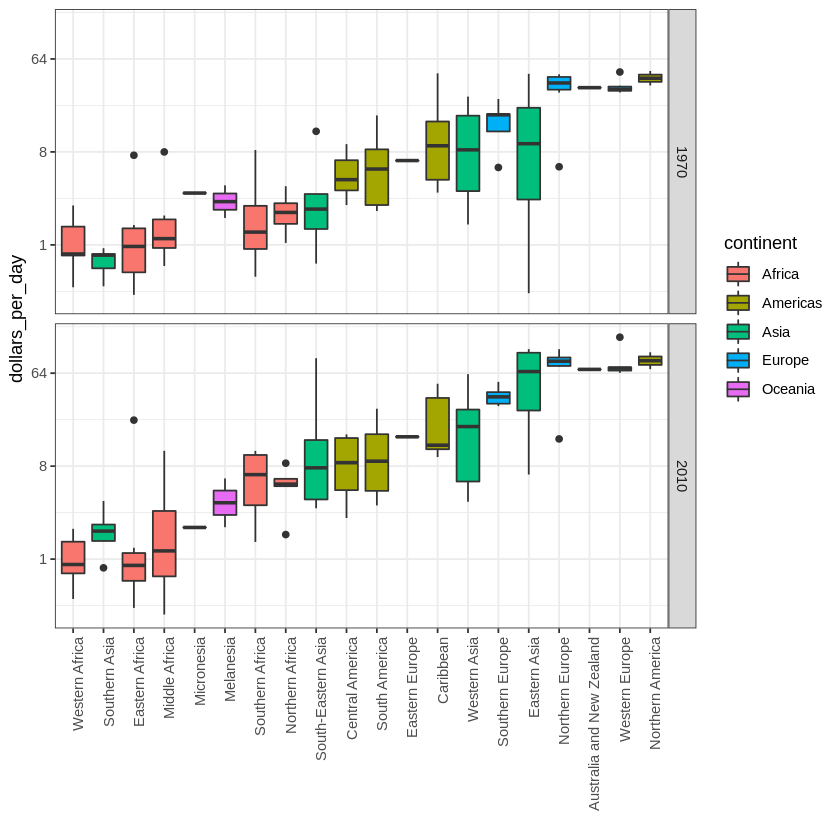

In [65]:
  
 p + geom_boxplot(aes(region, dollars_per_day, fill = continent)) +
     facet_grid(year ~ .)
 


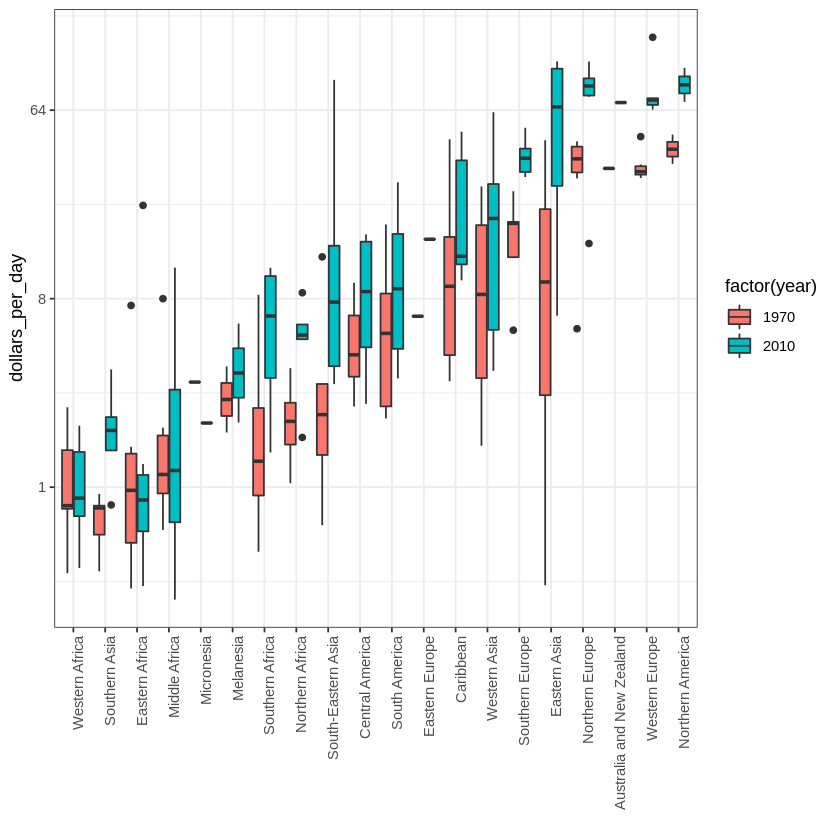

In [66]:
 # arrange matching boxplots next to each other, colored by year
 p + geom_boxplot(aes(region, dollars_per_day, fill = factor(year)))

##Density Plots
- Change the y-axis of density plots to variable counts using ..count.. as the y argument.
- The case_when() function defines a factor whose levels are defined by a variety of logical operations to group data.
- Plot stacked density plots using position="stack".
- Define a weight aesthetic mapping to change the relative weights of density plots - for example, this allows weighting of plots by population rather than number of countries.

In [67]:
#1.Code: Faceted smooth density plots
# see the code below the previous video for variable definitions

# smooth density plots - area under each curve adds to 1
gapminder %>%
    filter(year == past_year & country %in% country_list) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>% group_by(group) %>%
    summarize(n = n()) %>% knitr::kable()


`summarise()` ungrouping output (override with `.groups` argument)





|group      |  n|
|:----------|--:|
|Developing | 87|
|West       | 21|

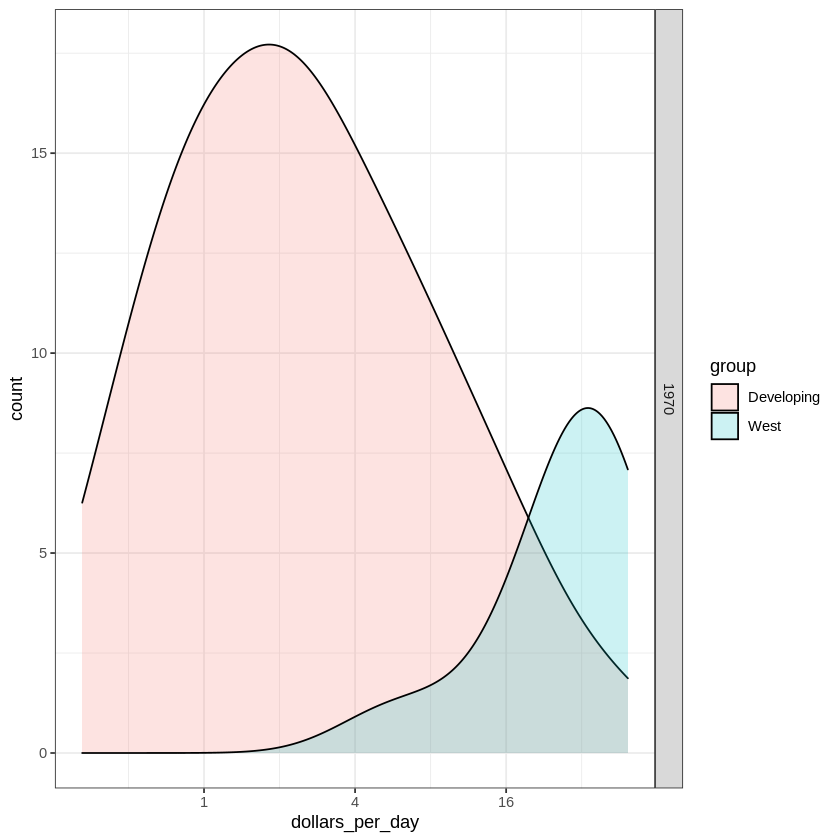

In [68]:

# smooth density plots - variable counts on y-axis
p <- gapminder %>%
    filter(year == past_year & country %in% country_list) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day, y = ..count.., fill = group)) +
    scale_x_continuous(trans = "log2")
p + geom_density(alpha = 0.2, bw = 0.75) + facet_grid(year ~ .)


In [69]:
#2. Code: Add new region groups with case_when
# add group as a factor, grouping regions
gapminder <- gapminder %>%
    mutate(group = case_when(
            .$region %in% west ~ "West",
            .$region %in% c("Eastern Asia", "South-Eastern Asia") ~ "East Asia",
            .$region %in% c("Caribbean", "Central America", "South America") ~ "Latin America",
            .$continent == "Africa" & .$region != "Northern Africa" ~ "Sub-Saharan Africa",
            TRUE ~ "Others"))

# reorder factor levels
gapminder <- gapminder %>%
    mutate(group = factor(group, levels = c("Others", "Latin America", "East Asia", "Sub-Saharan Africa", "West")))


In [70]:
#3.Code: Stacked density plot
# note you must redefine p with the new gapminder object first
p <- gapminder %>%
  filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    ggplot(aes(dollars_per_day, fill = group)) +
    scale_x_continuous(trans = "log2")



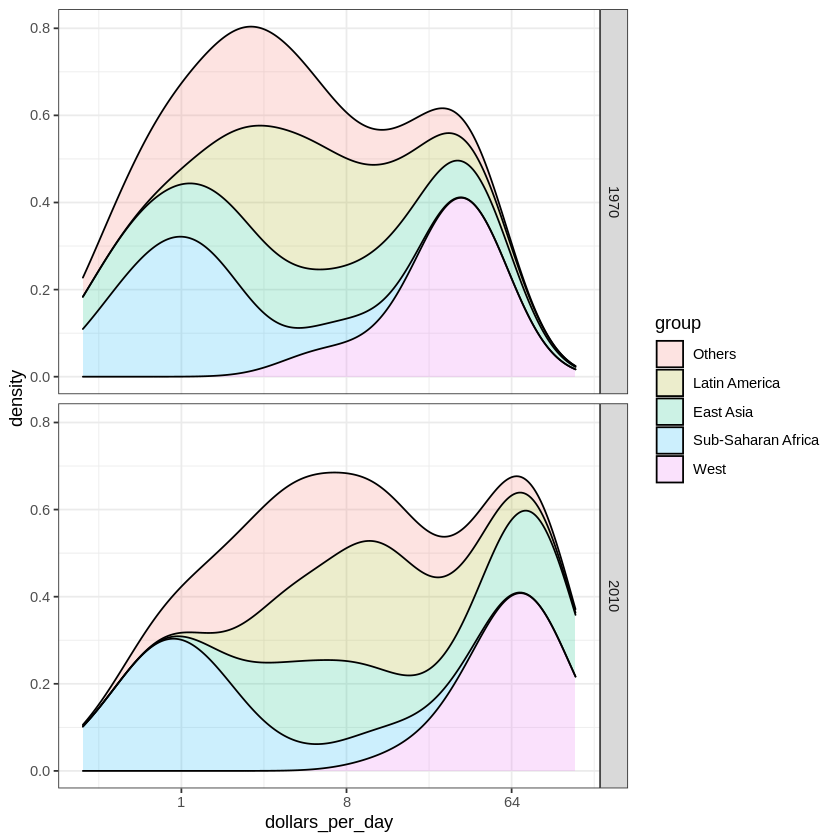

In [71]:
# stacked density plot
p + geom_density(alpha = 0.2, bw = 0.75, position = "stack") +
    facet_grid(year ~ .)


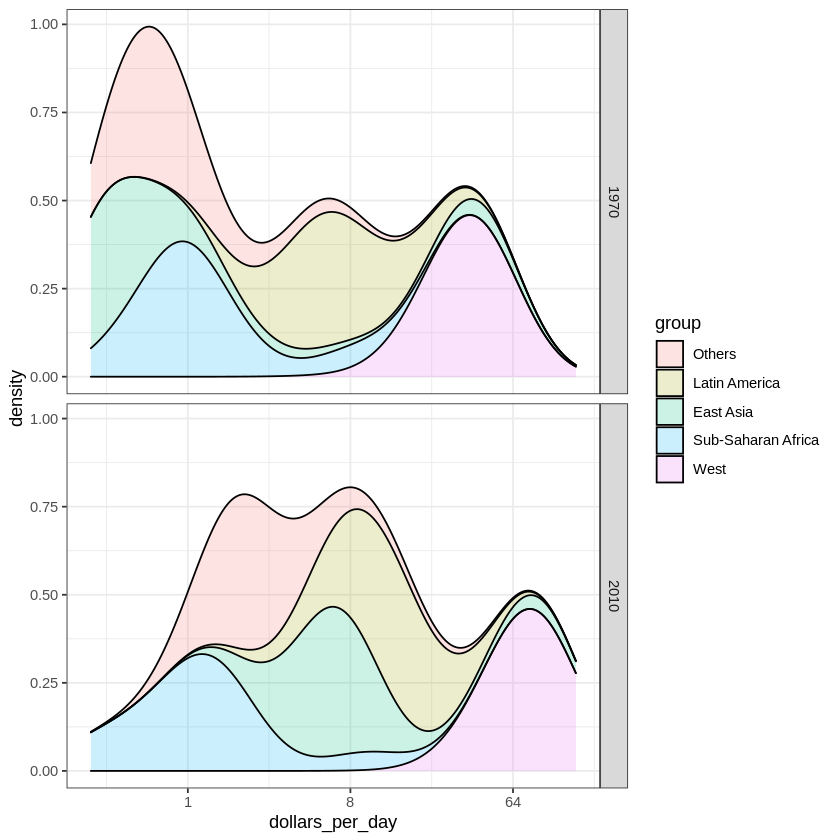

In [73]:
#4. Code: Weighted stacked density plot
# weighted stacked density plot
gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    group_by(year) %>%
    mutate(weight = population/sum(population*2)) %>%
    ungroup() %>%
    ggplot(aes(dollars_per_day, fill = group, weight = weight)) +
    scale_x_continuous(trans = "log2") +
    geom_density(alpha = 0.2, bw = 0.75, position = "stack") + facet_grid(year ~ .)

##Ecological Fallacy
- The breaks argument allows us to set the location of the axis labels and tick marks.
- The logistic or logit transformation is defined as  f(p)=logp1−p , or the log of odds. This scale is useful for highlighting differences near 0 or near 1 and converts fold changes into constant increases.
- The ecological fallacy is assuming that conclusions made from the average of a group apply to all members of that group.

`summarise()` ungrouping output (override with `.groups` argument)



group,income,infant_survival_rate
<chr>,<dbl>,<dbl>
Sub-Saharan Africa,1.759299,0.9358607
Southern Asia,2.070296,0.9521295
Pacific Islands,2.704745,0.9560088
Northern Africa,4.942935,0.9703514
Latin America,13.244228,0.9831732
East Asia,13.439078,0.9848303
The West,77.065524,0.9951445


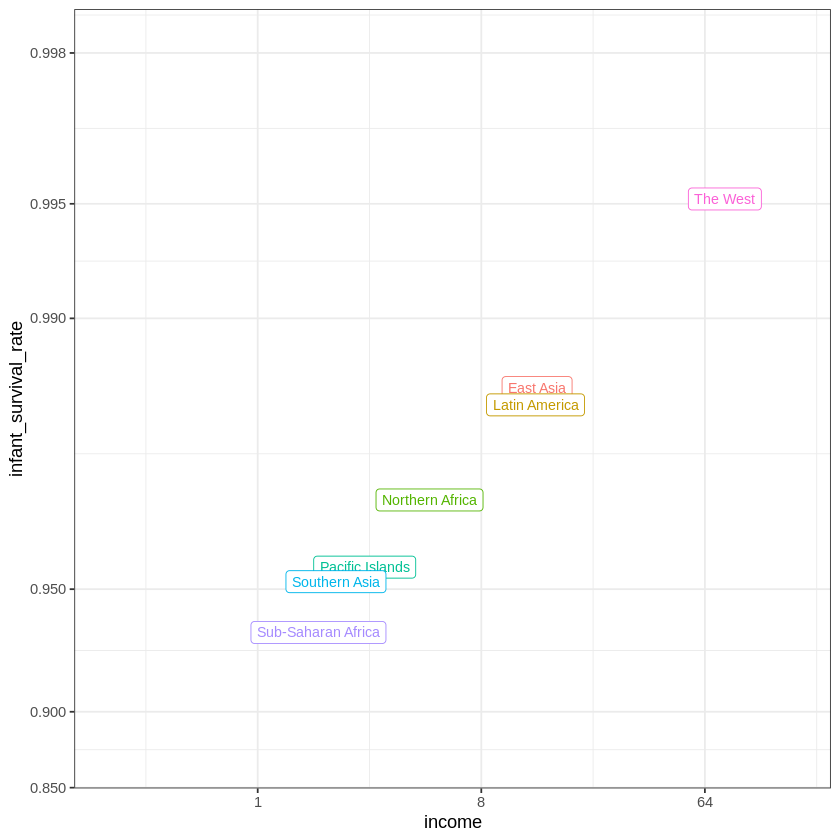

In [75]:
# define gapminder
library(tidyverse)
library(dslabs)
data(gapminder)

# add additional cases
gapminder <- gapminder %>%
    mutate(group = case_when(
        .$region %in% west ~ "The West",
        .$region %in% "Northern Africa" ~ "Northern Africa",
        .$region %in% c("Eastern Asia", "South-Eastern Asia") ~ "East Asia",
        .$region == "Southern Asia" ~ "Southern Asia",
        .$region %in% c("Central America", "South America", "Caribbean") ~ "Latin America",
        .$continent == "Africa" & .$region != "Northern Africa" ~ "Sub-Saharan Africa",
        .$region %in% c("Melanesia", "Micronesia", "Polynesia") ~ "Pacific Islands"))

# define a data frame with group average income and average infant survival rate
surv_income <- gapminder %>%
    filter(year %in% present_year & !is.na(gdp) & !is.na(infant_mortality) & !is.na(group)) %>%
    group_by(group) %>%
    summarize(income = sum(gdp)/sum(population)/365,
                        infant_survival_rate = 1 - sum(infant_mortality/1000*population)/sum(population))
surv_income %>% arrange(income)

# plot infant survival versus income, with transformed axes
surv_income %>% ggplot(aes(income, infant_survival_rate, label = group, color = group)) +
    scale_x_continuous(trans = "log2", limit = c(0.25, 150)) +
    scale_y_continuous(trans = "logit", limit = c(0.875, .9981),
                                       breaks = c(.85, .90, .95, .99, .995, .998)) +
    geom_label(size = 3, show.legend = FALSE) 